# Выполнил: Фаик Карим
# Группа: НФИбд-02-21

*Задание* на КР №1

Контрольная работа 1 – Вариант 23

1. Набор данных: wine_quality

2. Независимая переменная: features/residual sugar

3. Зависимая переменная: features/density

4. Визуализация для независимой переменной – диаграмма размаха

5. Визуализация для зависимой переменной – эмпирическая функция распределения

6. Показатель качества регрессии – MSE (mean squared error)


# 1. Загрузите заданный


In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
ds = tfds.load("wine_quality", split='train')
ds

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/4898 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/wine_quality/white/1.0.0.incompleteY9QJYN/wine_quality-train.tfrecord*...:…

Dataset wine_quality downloaded and prepared to /root/tensorflow_datasets/wine_quality/white/1.0.0. Subsequent calls will reuse this data.


<_PrefetchDataset element_spec={'features': {'alcohol': TensorSpec(shape=(), dtype=tf.float32, name=None), 'chlorides': TensorSpec(shape=(), dtype=tf.float32, name=None), 'citric acid': TensorSpec(shape=(), dtype=tf.float32, name=None), 'density': TensorSpec(shape=(), dtype=tf.float32, name=None), 'fixed acidity': TensorSpec(shape=(), dtype=tf.float32, name=None), 'free sulfur dioxide': TensorSpec(shape=(), dtype=tf.float32, name=None), 'pH': TensorSpec(shape=(), dtype=tf.float32, name=None), 'residual sugar': TensorSpec(shape=(), dtype=tf.float32, name=None), 'sulphates': TensorSpec(shape=(), dtype=tf.float64, name=None), 'total sulfur dioxide': TensorSpec(shape=(), dtype=tf.float32, name=None), 'volatile acidity': TensorSpec(shape=(), dtype=tf.float32, name=None)}, 'quality': TensorSpec(shape=(), dtype=tf.int32, name=None)}>

In [3]:
df = tfds.as_dataframe(ds)

df.head()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32,5
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27,6
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43,4
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41,6
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34,6


In [4]:
df_temp_1 = df.drop(['features/alcohol','features/fixed acidity','features/free sulfur dioxide','features/pH','features/residual sugar','features/total sulfur dioxide','quality'],axis=1)

In [5]:
df_temp_1.head()

,features/chlorides,features/citric acid,features/density,features/sulphates,features/volatile acidity
0,0.054,0.34,1.00080,0.55,0.32
1,0.063,0.49,0.99110,0.42,0.27
2,0.029,0.11,0.99076,0.48,0.43
3,0.110,0.27,0.99672,0.41,0.41
4,0.035,0.30,0.99016,0.34,0.34


# Вычислите матрицу корреляции признаков

<Axes: >

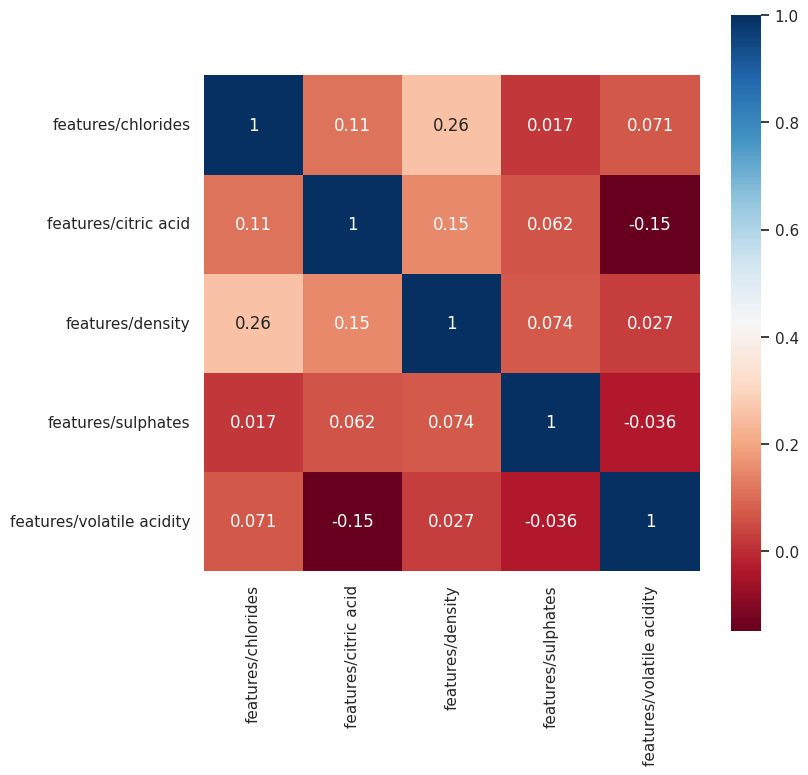

In [6]:


sns.set(font_scale=1)
plt.subplots(figsize=(8, 8))
sns.heatmap(df_temp_1.corr(), square=True,
              annot=True,cmap="RdBu")

In [7]:
print(np.min((df_temp_1.corr())))
print('features/volatile acidity, features/critic acid')

-0.14947181346836425
features/volatile acidity, features/critic acid


In [8]:
print('0.26')
print('features/density, features/chlorides')

0.26
features/density, features/chlorides


# 2. Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием

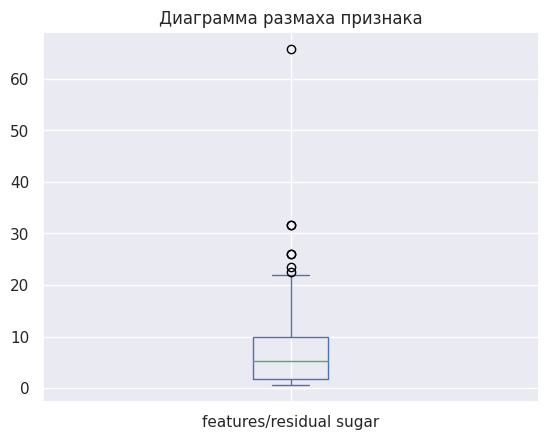

In [9]:
df['features/residual sugar'].plot.box(title='Диаграмма размаха признака');

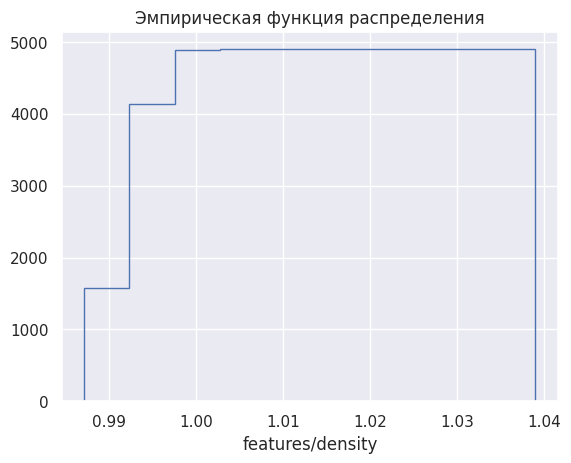

In [10]:
plt.hist(df['features/density'], histtype='step', cumulative=True)
plt.xlabel('features/density')
plt.title('Эмпирическая функция распределения')
plt.show()

# 3. Постройте диаграмму рассеяния для независимого и зависимого признаков, подписывая оси и рисунок,  -->

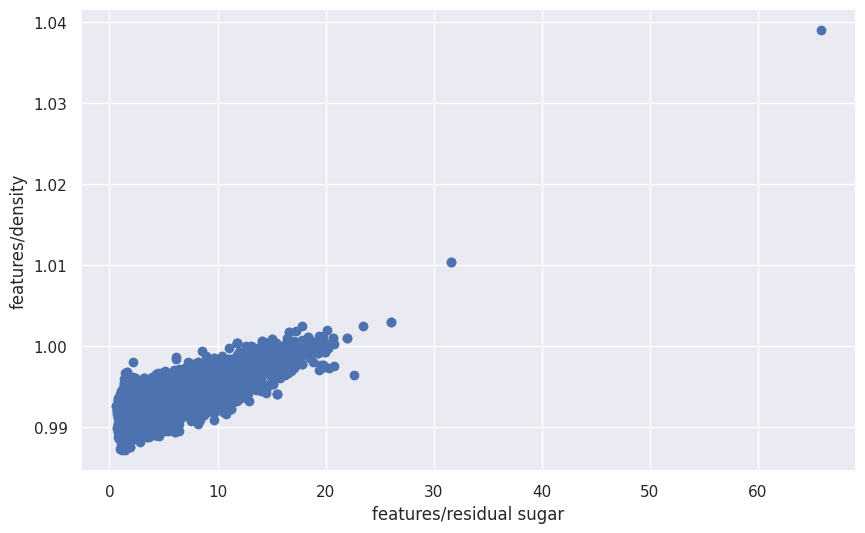

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['features/residual sugar'], y = df['features/density'])
plt.xlabel("features/residual sugar")
plt.ylabel("features/density")
plt.show()

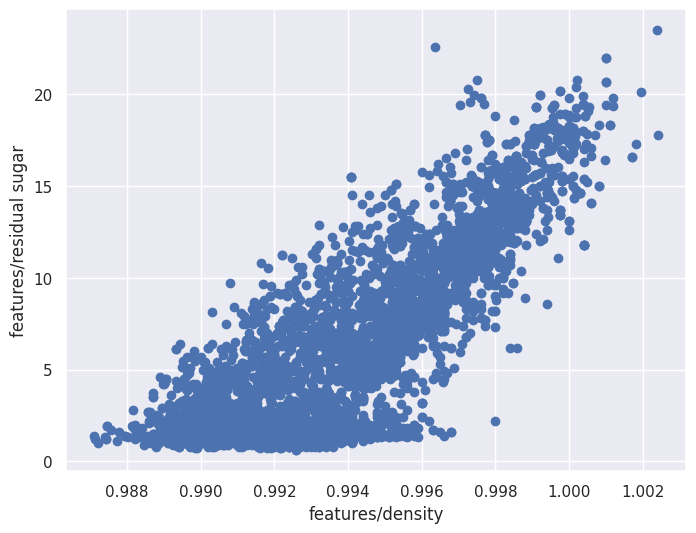

In [18]:
df1 = df[df['features/residual sugar'] < 25]

plt.figure(figsize=(8,6))
plt.scatter(df1[indep], df1[dep])
plt.xlabel(indep)
plt.ylabel(dep)
plt.show()

#4. Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети

In [19]:
import torch
from torch import nn
from torch import optim
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [20]:
class MyModel(nn.Module):
    def __init__(self, nX=1, nH=1):
        super().__init__()
        self.fc1 = nn.Linear(nX, nH)

    def forward(self, x):
        x = self.fc1(x)
        return x

In [21]:
dep, indep = 'features/residual sugar', 'features/density'

In [22]:
model = MyModel(1, 1)
lr = LinearRegression()

X, y = np.array(df1[indep]).reshape(-1, 1), np.array(df1[dep]).reshape(-1, 1)

x_tensor, y_tensor = torch.Tensor(X).reshape(-1, 1), torch.Tensor(y).reshape(-1, 1)

loss = nn.MSELoss()

def fit(model, X, Y, regularization=None, lr=1, alpha=1, epoch=50_000, history=False):

    def l1_regularization(model, reg_strength=1e-4):
        l1_loss = 0
        for param in model.parameters():
            l1_loss += torch.sum(abs(param))
        return reg_strength * l1_loss

    history_loss = []

    if regularization == 'l2':
        optimizer = optim.RMSprop(model.parameters(), lr=lr, weight_decay=alpha)
    else:
        optimizer = optim.RMSprop(model.parameters(), lr=lr)

    loss_sum = 0

    for i in range(epoch):
        y = model(X)
        L = loss(y, Y) + l1_regularization(model, alpha) if regularization == 'l1' else loss(y, Y)

        optimizer.zero_grad()
        L.backward()
        optimizer.step()
        loss_sum += L.item()

        if history and (i + 1) % 250 == 0:
            history_loss.append(loss_sum)
            loss_sum = 0

    if history:
        return model, history_loss

    return model


In [23]:
model, history_loss = fit(model, X=x_tensor, Y=y_tensor, history=True, epoch=100_000)
lr = lr.fit(X, y)

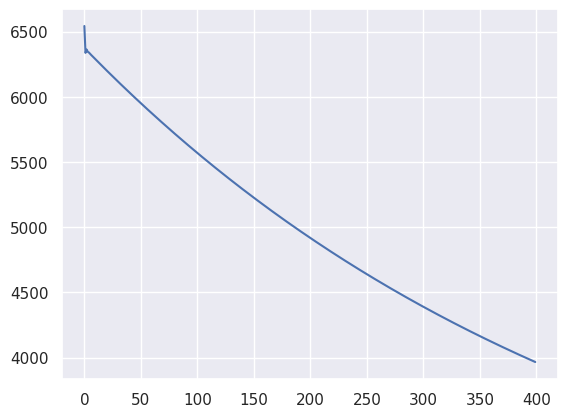

In [24]:

plt.plot(list(range(len(history_loss))), history_loss)
plt.show()

In [25]:
model.eval()
y_predict_model = model(x_tensor).detach().numpy()
y_predict_lr = lr.predict(X)

print(f'R2-score model:\t {r2_score(y, y_predict_model)}')
print(f'R2-score lr:\t {r2_score(y, y_predict_lr)}')

R2-score model:	 0.35559720570309306
R2-score lr:	 0.6911938144330179


# 5. Диаграмма рассеияния и линии регрессии

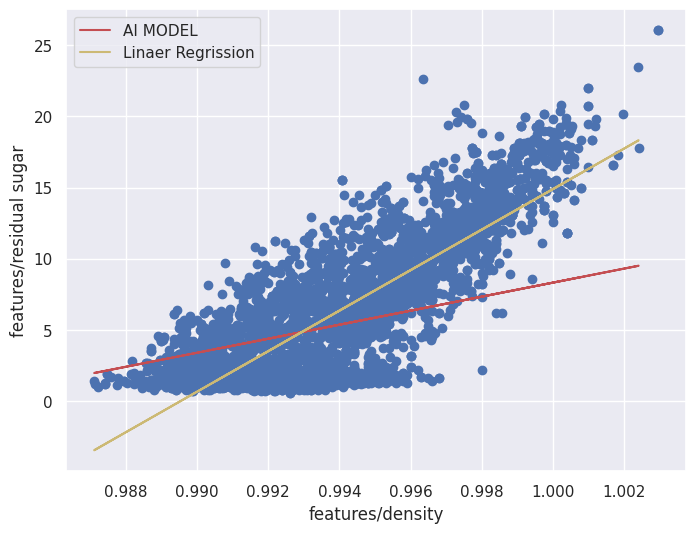

In [26]:
df1 = df[df[indep] < 1.01]

plt.figure(figsize=(8,6))
plt.scatter(df1[indep], df1[dep])
plt.plot(X, y_predict_model, label='AI MODEL', color='r')
plt.plot(X, y_predict_lr, label='Linaer Regrission', color='y')
plt.xlabel(indep)
plt.ylabel(dep)
plt.legend()
plt.show()

# 6. Разбейте набор признаков на обучающую и контрольную выборки. Создайте и адаптируйте нормализующий слой Tensorflow

In [27]:
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
normalizer = tf.keras.layers.Normalization(axis=-1)

normalizer.adapt(df1.drop(columns=[dep]))

X, Y = np.array(normalizer(df1.drop(columns=[dep]))), np.array(df1[dep]).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(normalizer.mean.numpy())

[[1.0514727e+01 4.5763634e-02 3.3415928e-01 9.9401176e-01 6.8541651e+00
  3.5313770e+01 3.1882417e+00 4.8985082e-01 1.3834084e+02 2.7807963e-01
  5.8778353e+00]]


# 7. Используя созданный нормализующий слой и нормализованный зависимый признак, постройте регресоры на базе следующих моделей множественной регрессии:

линейной регрессии

гребневой регрессии (L2)

лассо регрессии (L1)

In [29]:
lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

print(f'R2-score lr:\t {round(r2_score(y_test, y_pred_lr), 5)}')

# L1 регуляризация
lasso = Lasso(alpha=0.7)
lasso.fit(x_train, y_train)

y_pred_lasso = lasso.predict(x_test)

print(f'R2-score L1:\t {round(r2_score(y_test, y_pred_lasso), 5)}')


# L2 регуляризация
reg = Ridge(alpha=15)
reg.fit(x_train, y_train)

y_pred_reg = reg.predict(x_test)

print(f'R2-score L2:\t {round(r2_score(y_test, y_pred_reg), 5)}')


R2-score lr:	 0.9413
R2-score L1:	 0.67508
R2-score L2:	 0.94092


## Нейронная сеть

In [30]:
model_lin = tf.keras.Sequential([ normalizer ,tf.keras.layers.Dense(1)])

model_lin.compile( loss="MSE",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.25))

history_l = model_lin.fit(x_train, y_train, epochs=150, validation_split= 0.2, verbose=0)

In [31]:
model_l1 = tf.keras.Sequential([ normalizer ,tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.L1(l1=0.01))])

model_l1.compile( loss="MSE",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.25))

history_l1 = model_l1.fit(x_train, y_train, epochs=150, validation_split= 0.2, verbose=0)

In [32]:
model_l2 = tf.keras.Sequential([ normalizer ,tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))])

model_l2.compile( loss="MSE",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.25))

history_l2 = model_l2.fit(x_train, y_train, epochs=150, validation_split= 0.2, verbose=0)

In [33]:
model_lin.evaluate(x_test, y_test)

31/31 [==============================] - 0s 3ms/step - loss: 56.1627


56.16269302368164

In [34]:
model_l1.evaluate(x_test, y_test)

31/31 [==============================] - 0s 3ms/step - loss: 2.4307


2.430704116821289

In [35]:
model_l2.evaluate(x_test, y_test)

31/31 [==============================] - 0s 2ms/step - loss: 6.3840


6.383962154388428

# 8. Определите на контрольной выборке лучшую модель

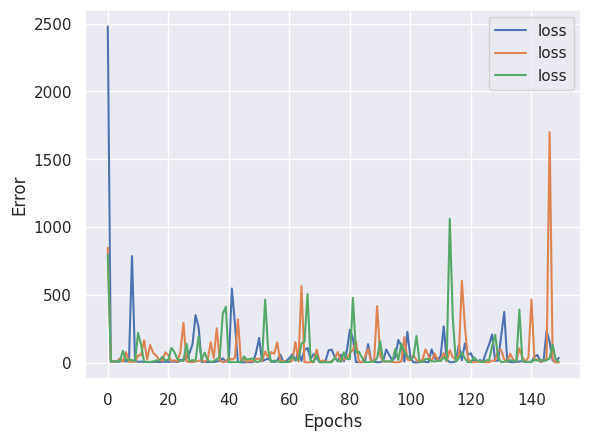

In [44]:
plt.plot(history_l.history['loss'], label='loss')
plt.plot(history_l1.history['loss'], label='loss')
plt.plot(history_l2.history['loss'], label='loss')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

# 9. Валидируем лучшую модель

In [45]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, max(history.history['loss'])*0.5])
  plt.xlabel('Epochs')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

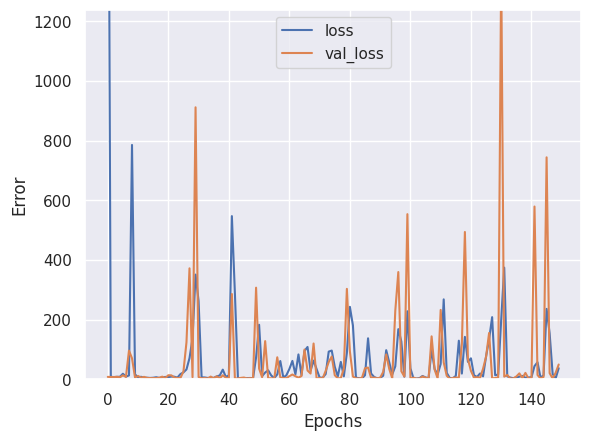

In [46]:
plot_loss(history_l)

# 10. Медианные значения приазнаков

In [47]:
MSE = df.drop(columns=[dep, indep]).median()
MSE

features/alcohol                  10.400
features/chlorides                 0.043
features/citric acid               0.320
features/fixed acidity             6.800
features/free sulfur dioxide      34.000
features/pH                        3.180
features/sulphates                 0.470
features/total sulfur dioxide    134.000
features/volatile acidity          0.260
quality                            6.000
dtype: float64